# Amirhosein Zaboli (9926843)
### Q1

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

2024-01-30 21:38:09.221574: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


HighQuality
1.0    100
0.0     22
Name: count, dtype: int64


<Axes: xlabel='HighQuality'>

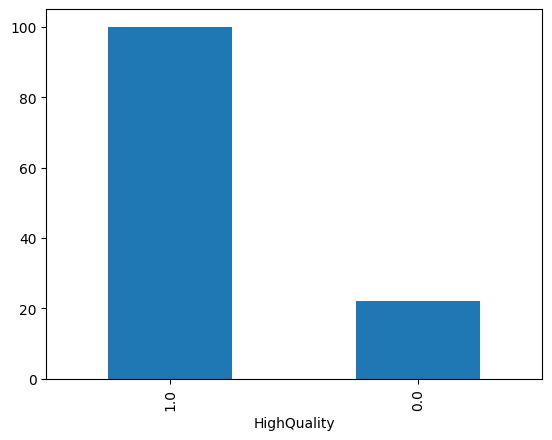

In [2]:
df = pd.read_csv("capacitor_test.csv")

values = df["HighQuality"].value_counts()
print(values)
df["HighQuality"].value_counts().plot(kind="bar")

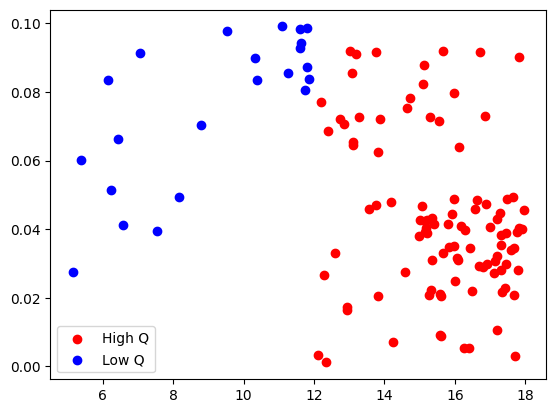

In [5]:
highq = df[(df["HighQuality"] == 1.0)].to_numpy()
lowq = df[(df["HighQuality"] == 0.0)].to_numpy()

fig, ax = plt.subplots()
ax.scatter(highq[:, 0], highq[:, 1], c='r', label="High Q")
ax.scatter(lowq[:, 0], lowq[:, 1], c='b', label="Low Q")
plt.legend()
plt.show()

In [6]:
features = df.drop(columns="HighQuality", axis=1).to_numpy()
Y = df["HighQuality"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.15, random_state=10)

In [7]:
model = LogisticRegression()
model.fit (X_train, y_train)

LogisticRegression()

In [8]:
b = model.intercept_[0]
W = model.coef_[0]

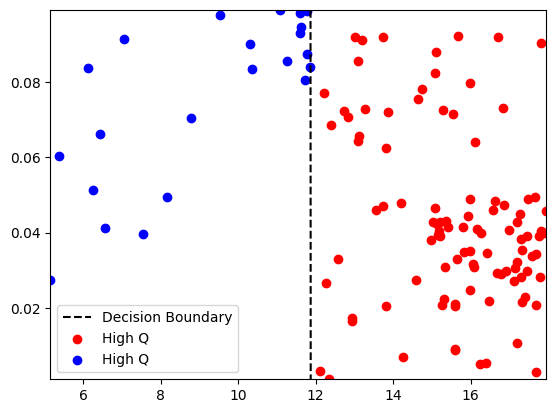

In [9]:
fig, ax = plt.subplots()

x1_min, x1_max = features[:, 0].min(), features[:, 0].max()
x2_min, x2_max = features[:, 1].min(), features[:, 1].max()

xx = np.linspace(x1_min, x1_max)
yy = (W[0]/W[1])*xx + (b/W[1])

ax.set_xlim([x1_min, x1_max])
ax.set_ylim([x2_min, x2_max])
ax.plot(xx, yy, 'k--', label="Decision Boundary")
ax.scatter(highq[:, 0], highq[:, 1], c='r', label="High Q")
ax.scatter(lowq[:, 0], lowq[:, 1], c='b', label="High Q")
plt.legend()
plt.show()

### Q2

In [10]:
df = pd.read_csv('global air pollution dataset.csv')

df.head()

,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,Moderate,1,36,0,51
1,Good,1,5,1,41
2,Moderate,1,39,2,66
3,Good,1,34,0,20
4,Good,0,22,0,6


Changing labels for "AQI Category" into numbers:

In [14]:
df['AQI Category'] = LabelEncoder().fit_transform(df['AQI Category'])
df.head()

,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,2,1,36,0,51
1,0,1,5,1,41
2,2,1,39,2,66
3,0,1,34,0,20
4,0,0,22,0,6


In [17]:
X = df.drop('AQI Category', axis=1)
y = df['AQI Category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (18770, 4)
X_test shape: (4693, 4)
y_train shape: (18770,)
y_test shape: (4693,)


In [19]:
n_features = X_train.shape[1]

n_classes = 6

model = Sequential()
model.add(Dense(32, input_dim=n_features, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))  # Output layer

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=200, batch_size=2048,
                    validation_split=0.2)

Epoch 1/200
8/8 [==============================] - 1s 30ms/step - loss: 1.6991 - accuracy: 0.6458 - val_loss: 1.5832 - val_accuracy: 0.6982
Epoch 2/200
8/8 [==============================] - 0s 10ms/step - loss: 1.5030 - accuracy: 0.7162 - val_loss: 1.3151 - val_accuracy: 0.7238
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 1.1852 - accuracy: 0.7051 - val_loss: 0.9463 - val_accuracy: 0.6878
Epoch 4/200
8/8 [==============================] - 0s 10ms/step - loss: 0.8493 - accuracy: 0.6769 - val_loss: 0.7018 - val_accuracy: 0.7235
Epoch 5/200
8/8 [==============================] - 0s 11ms/step - loss: 0.6414 - accuracy: 0.7686 - val_loss: 0.5336 - val_accuracy: 0.8247
Epoch 6/200
8/8 [==============================] - 0s 14ms/step - loss: 0.4847 - accuracy: 0.8420 - val_loss: 0.4006 - val_accuracy: 0.8639
Epoch 7/200
8/8 [==============================] - 0s 12ms/step - loss: 0.3697 - accuracy: 0.8702 - val_loss: 0.3230 - val_accuracy: 0.8820
Epoch 8/200
8/8 [====

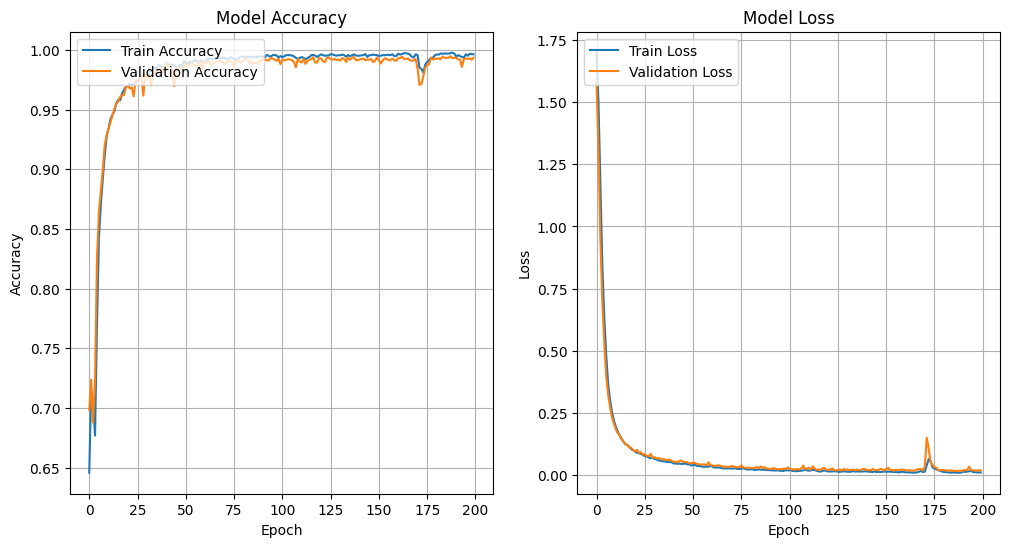

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

### Q3

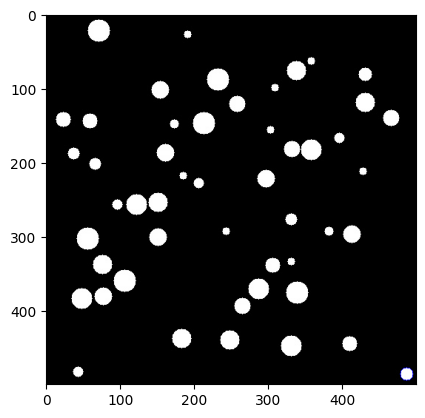

Area of one polymer in image8.jpg: 228.0
Threshold for single polymer (with 40-pixel variation): 268.0



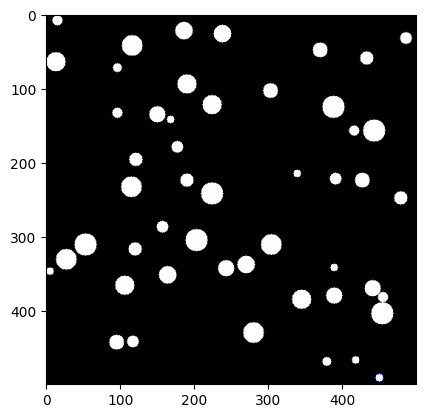

Area of one polymer in image9.jpg: 96.0
Threshold for single polymer (with 40-pixel variation): 136.0



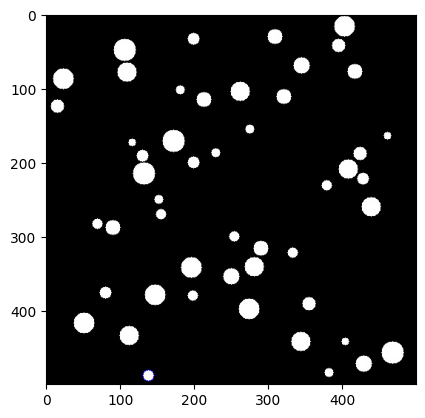

Area of one polymer in image10.jpg: 174.0
Threshold for single polymer (with 40-pixel variation): 214.0



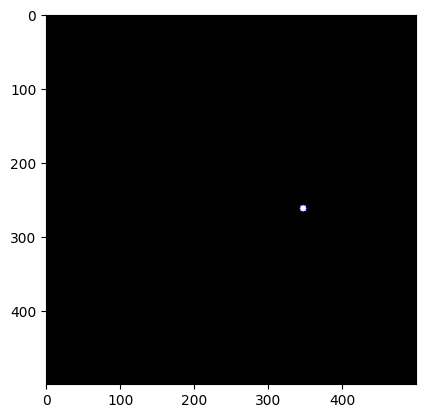

Area of one polymer in base.jpg: 66.0
Threshold for single polymer (with 40-pixel variation): 106.0



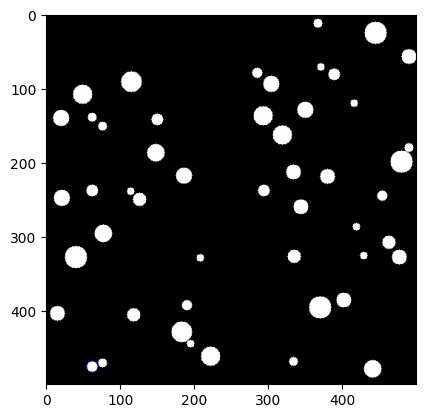

Area of one polymer in image7.jpg: 174.0
Threshold for single polymer (with 40-pixel variation): 214.0



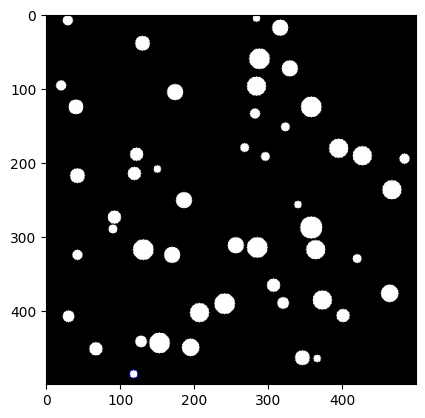

Area of one polymer in image6.jpg: 96.0
Threshold for single polymer (with 40-pixel variation): 136.0



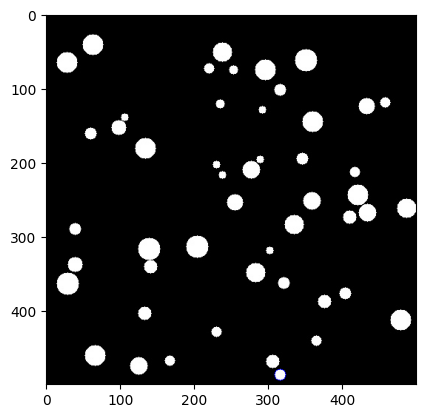

Area of one polymer in image4.jpg: 174.0
Threshold for single polymer (with 40-pixel variation): 214.0



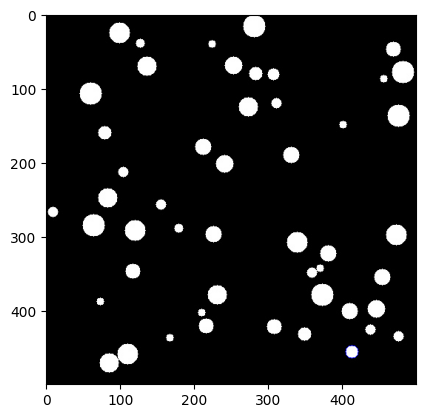

Area of one polymer in image5.jpg: 228.0
Threshold for single polymer (with 40-pixel variation): 268.0



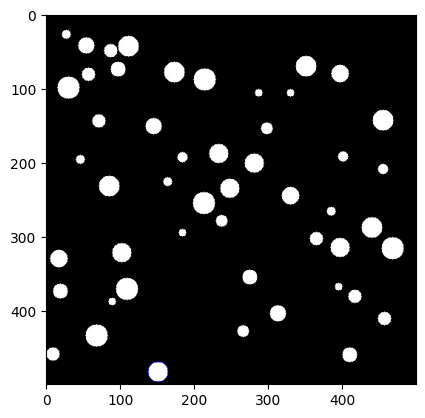

Area of one polymer in image1.jpg: 574.0
Threshold for single polymer (with 40-pixel variation): 614.0



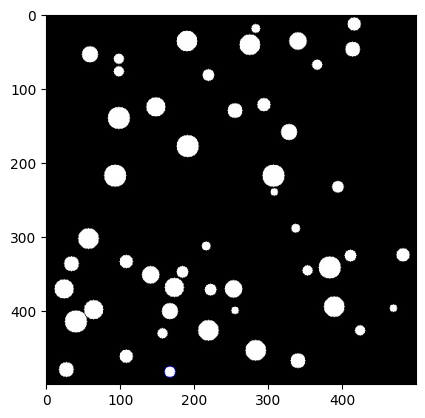

Area of one polymer in image2.jpg: 174.0
Threshold for single polymer (with 40-pixel variation): 214.0



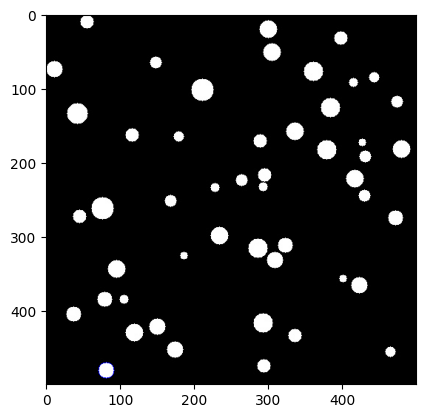

Area of one polymer in image3.jpg: 346.0
Threshold for single polymer (with 40-pixel variation): 386.0



In [33]:
import cv2
import os

directory_path = 'Polymer'

for filename in os.listdir(directory_path):
    
    file_path = os.path.join(directory_path, filename)

    if os.path.isfile(file_path) and file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        image = cv2.imread(file_path)

        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

        contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            base_area = cv2.contourArea(contours[0])

            cv2.drawContours(image, [contours[0]], -1, (0, 0, 255), 1)

            plt.imshow(image)
            plt.show()

            print(f"Area of one polymer in {filename}: {base_area}")
            print(f"Threshold for single polymer (with 40-pixel variation): {base_area + 40}\n")

In [34]:
base_image_path = os.path.join(directory_path, 'base.jpg')
base_image = cv2.imread(base_image_path)
base_gray_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
_, base_binary_image = cv2.threshold(base_gray_image, 128, 255, cv2.THRESH_BINARY)
base_contours, _ = cv2.findContours(base_binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
base_area = cv2.contourArea(base_contours[0])

# Get the list of image paths excluding the base image
images_path = [filename for filename in os.listdir(directory_path) if filename != 'base.jpg']

single_poly_counter = 0
multiple_poly_counter = 0
all_contours_area = []
outputs = {}

for image_path in images_path:
    print(f"{image_path}: Processed")
    current_image_path = os.path.join(directory_path, image_path)
    image = cv2.imread(current_image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contours_area = []
    for contour in contours:
        area = cv2.contourArea(contour)
        contours_area.append(area)
        all_contours_area.append(area)

        if base_area - 40 < area < base_area + 40:
            single_poly_counter += 1
            cv2.drawContours(image, [contour], -1, (0, 255, 0), 1)
        else:
            multiple_poly_counter += 1
            cv2.drawContours(image, [contour], -1, (0, 0, 255), 1)

    outputs[image_path] = {"contours_area": contours_area, "contours": contours}

print(f"Number of images processed: {len(images_path)}")
print(f"Number of single polymer contours: {single_poly_counter}")
print(f"Number of multiple polymer contours: {multiple_poly_counter}")
print(f"Total number of contours: {single_poly_counter + multiple_poly_counter}")
print(f"All contours areas: {all_contours_area}")

image8.jpg: Processed
image9.jpg: Processed
image10.jpg: Processed
image7.jpg: Processed
image6.jpg: Processed
image4.jpg: Processed
image5.jpg: Processed
image1.jpg: Processed
image2.jpg: Processed
image3.jpg: Processed
Number of images processed: 10
Number of single polymer contours: 84
Number of multiple polymer contours: 415
Total number of contours: 499
All contours areas: [228.0, 130.0, 288.0, 574.0, 492.0, 492.0, 346.0, 574.0, 408.0, 666.0, 574.0, 666.0, 66.0, 288.0, 492.0, 408.0, 66.0, 666.0, 96.0, 408.0, 174.0, 130.0, 574.0, 492.0, 130.0, 66.0, 408.0, 66.0, 174.0, 174.0, 408.0, 920.0, 130.0, 66.0, 96.0, 288.0, 666.0, 288.0, 346.0, 346.0, 492.0, 66.0, 408.0, 666.0, 228.0, 492.0, 66.0, 66.0, 666.0, 96.0, 96.0, 66.0, 174.0, 288.0, 574.0, 492.0, 346.0, 1148.0, 2.0, 2.0, 492.0, 66.0, 408.0, 66.0, 346.0, 408.0, 574.0, 228.0, 574.0, 666.0, 666.0, 174.0, 228.0, 666.0, 574.0, 228.0, 288.0, 174.0, 66.0, 228.0, 174.0, 130.0, 666.0, 66.0, 130.0, 346.0, 666.0, 492.0, 288.0, 492.0, 96.0, 49

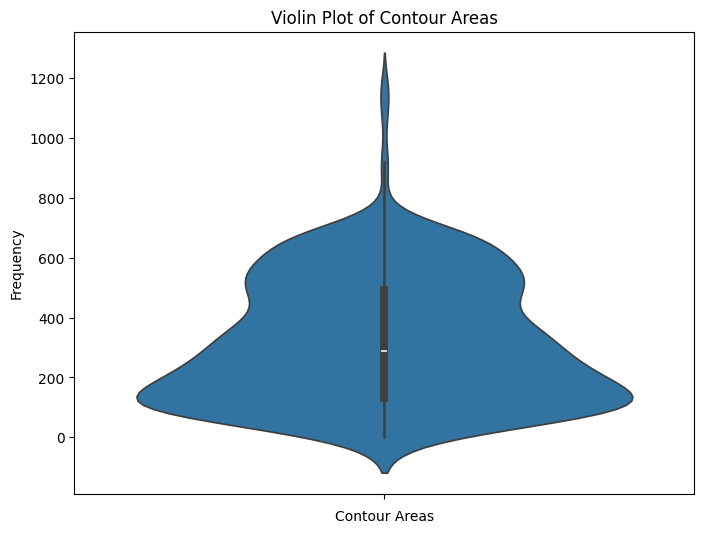

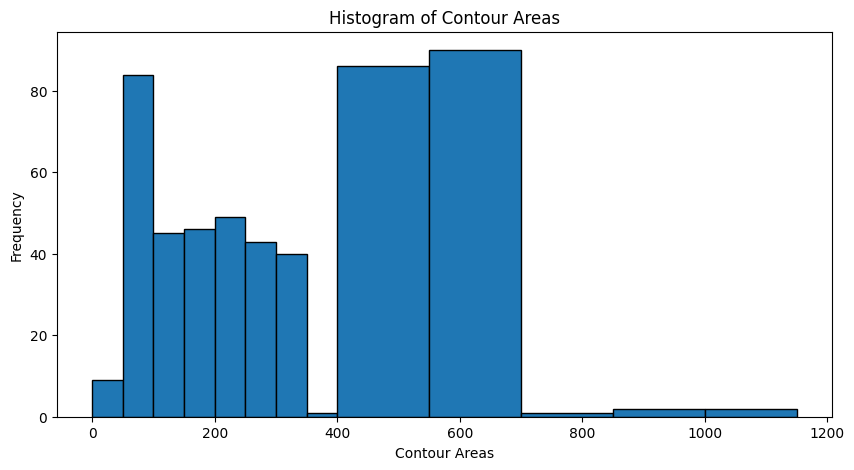

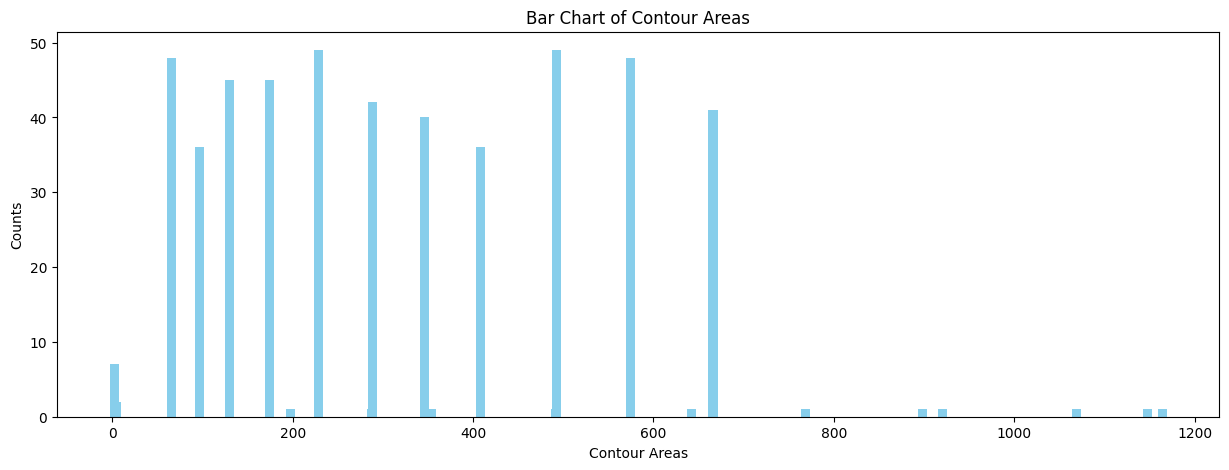

In [35]:
import seaborn as sns
from collections import Counter

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(all_contours_area)
plt.title('Violin Plot of Contour Areas')
plt.xlabel('Contour Areas')
plt.ylabel('Frequency')
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
bins_below_200 = np.arange(0, 400, 50)
bins_above_200 = np.arange(400, max(all_contours_area) + 50, 150)
bins = np.concatenate((bins_below_200, bins_above_200))
plt.hist(all_contours_area, bins=bins, edgecolor='black')
plt.title('Histogram of Contour Areas')
plt.xlabel('Contour Areas')
plt.ylabel('Frequency')
plt.show()

# Bar chart
plt.figure(figsize=(15, 5))
area_counts = Counter(all_contours_area)
unique_areas = list(area_counts.keys())
counts = list(area_counts.values())
plt.bar(unique_areas, counts, width=10, color='skyblue')
plt.title('Bar Chart of Contour Areas')
plt.xlabel('Contour Areas')
plt.ylabel('Counts')
plt.show()

### Q4

In [46]:
from PIL import Image
import tensorflow as tf

def load_images_from_folder(base_folder):
    images = []
    labels = []
    label_map = {'Circle': 0, 'Triangle': 1, 'Rectangle': 2}

    for label_folder in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, label_folder)
        label = label_map[label_folder]
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                with Image.open(img_path) as img:
                    img_array = np.array(img)
                    span = img_array.max() - img_array.min()
                    if span > 0:
                        img_array = (img_array - img_array.min()) / span
                    images.append(img_array)
                    labels.append(label)
    return images, labels

folder = 'Shapes'

X, y = load_images_from_folder(folder)

X = np.array(X)
y = np.array(y)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

y_train = tf.keras.utils.to_categorical(y_train, 3)
y_val = tf.keras.utils.to_categorical(y_val, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_and_preprocess_images(base_folder, image_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    train_generator = datagen.flow_from_directory(
        base_folder,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        seed=42
    )

    val_generator = datagen.flow_from_directory(
        base_folder,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        seed=42
    )

    return train_generator, val_generator

base_folder = 'Shapes'
image_size = (224, 224)
batch_size = 32

train_generator, val_generator = load_and_preprocess_images(base_folder, image_size, batch_size)


Found 4500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(50, 50)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'\nFinal Testing loss: {test_loss}, acc: {test_accuracy}\n')

Epoch 1/100
120/120 [==============================] - 1s 4ms/step - loss: 0.9538 - accuracy: 0.5195 - val_loss: 0.7901 - val_accuracy: 0.6354
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.7344 - val_loss: 0.5516 - val_accuracy: 0.7677
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8443 - val_loss: 0.3964 - val_accuracy: 0.8354
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 0.2750 - accuracy: 0.9034 - val_loss: 0.3461 - val_accuracy: 0.8729
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9318 - val_loss: 0.3287 - val_accuracy: 0.8750
Epoch 6/100
120/120 [==============================] - 0s 4ms/step - loss: 0.1411 - accuracy: 0.9544 - val_loss: 0.3727 - val_accuracy: 0.8438
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.1124 - accuracy: 0.9620 - val_loss: 0.2619 - val_accuracy: 0.9094

In [50]:
model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'\nFinal Testing loss: {test_loss}, acc: {test_accuracy}\n')

Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 0.7376 - accuracy: 0.8010 - val_loss: 0.5784 - val_accuracy: 0.7802
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 0.2808 - accuracy: 0.8930 - val_loss: 0.3215 - val_accuracy: 0.8740
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.9346 - val_loss: 0.3558 - val_accuracy: 0.8594
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 0.1031 - accuracy: 0.9638 - val_loss: 0.2986 - val_accuracy: 0.9031
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.9672 - val_loss: 0.2983 - val_accuracy: 0.9094
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9794 - val_loss: 0.3486 - val_accuracy: 0.9031
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9826 - val_loss: 0.3043 - val_accuracy: 0.9219

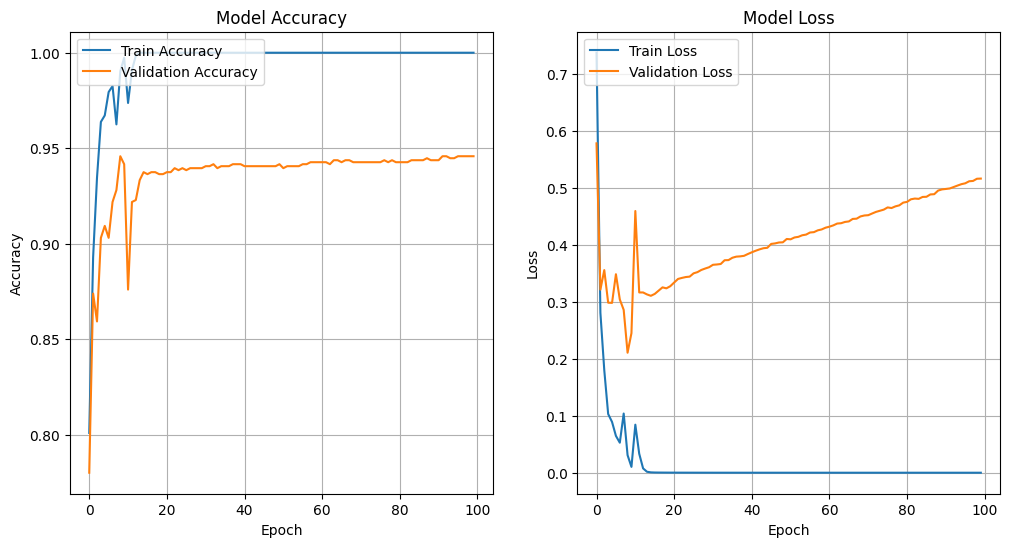

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

# Plot training, validation, and test loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

1/1 [==============================] - 0s 86ms/step


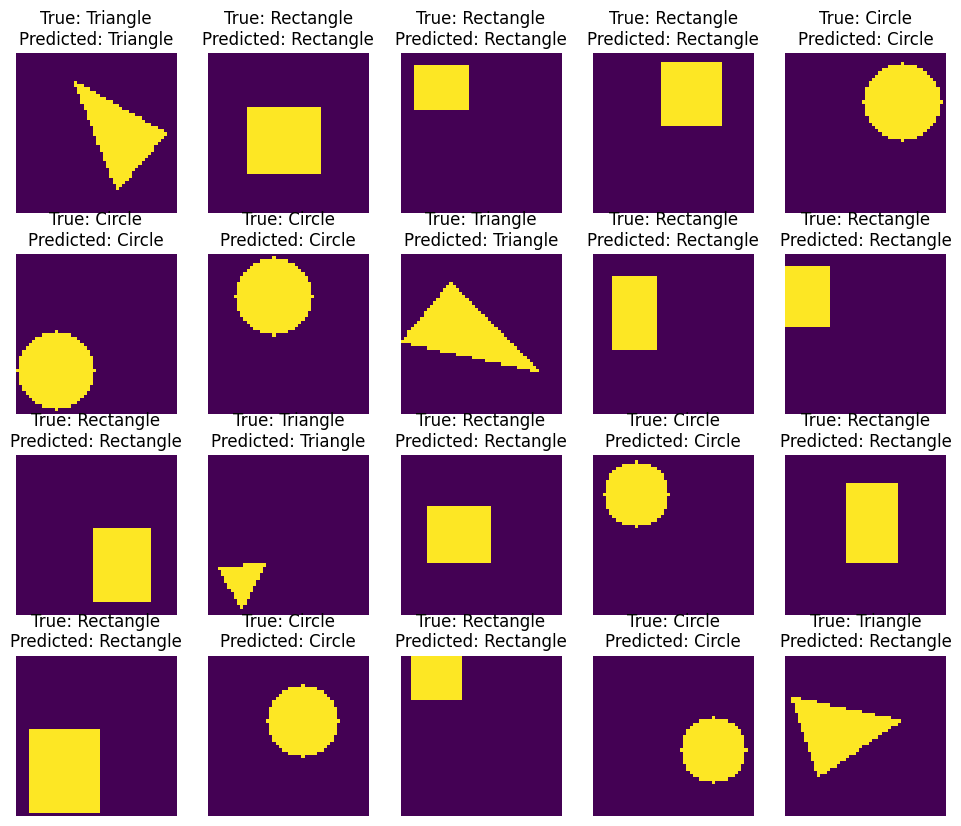

In [58]:
swapped_label_map = {0: 'Circle', 1: 'Triangle', 2: 'Rectangle'}

num = 20
selected_indices = np.random.choice(len(X), num, replace=False)

selected_images = X[selected_indices]
true_labels = y[selected_indices]

predictions = model.predict(selected_images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(4, 5, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i])
    ax.set_title(f"True: {swapped_label_map[true_labels[i]]}\nPredicted: {swapped_label_map[predicted_labels[i]]}")
    ax.axis('off')

plt.show()